## Experiment 8

Aumkar Gadekar <br>
Rno 21 <br>

In [22]:
import numpy as np
import pandas as pd
import math
import random

#### Set hyperparameters

Initial number of chromosomes : 6 <br>
Cross-over Rate : 0.25 <br>
Mutation Rate : 0.1 <br>

In [23]:
cr=0.25
mr=0.1

#### Objective Function

In [24]:
def obj(arr):
    return abs(arr[0]+2*arr[1]+3*arr[2]-20)

#### Fitness function

In [25]:
def fitness(val):
    return 1/(1+val)

#### Probability

In [26]:
def prob(arr):
    tot=sum(arr)
    for i in range(len(arr)):
        arr[i]=arr[i]/tot
    return arr

#### Roulette Wheel

In [27]:
def roul(arr):
    new=[]
    curr=0
    for i in range(len(arr)):
        new.append(arr[i]+curr)
        curr=new[i]
    return new

#### Selection

In [28]:
def selection(arr):
    rand=[]
    l=len(arr)
    for i in range(l):
        rand.append(random.random())
    sel=[]
    for j in rand:
        for k in range(l):
            if(j<=arr[k]):
                sel.append(k)
                break
                
    return sel

#### Crossover

In [29]:
def crossover(arr,cr):
    print("before = ",arr)
    rand=[]
    l=len(arr)
    for i in range(l):
        rand.append(random.random())
    cross=[]
    for j in range(len(rand)):
        if rand[j]<cr:
            cross.append(j)
    new=[]
    print("chosen =",cross)
    for i in range(len(cross)):
        par1=arr[cross[i]]
        if(i==len(cross)-1):
            par2=arr[cross[0]]
        else:
            par2=arr[cross[i+1]]
        cross_point=random.randint(1,2)
        print("Cross point ", cross_point)
        n1=[]
        for u in range(0,cross_point):
            n1.append(par1[u])
        for v in range(cross_point,3):
            n1.append(par2[v])
        new.append(n1)
    print("new ",new)
    for i in range(len(cross)):
        arr[cross[i]]=new[i]
    print("final ",arr)
    return arr

#### Mutation

In [30]:
def mutation(arr,mr):
    total=len(arr)*len(arr[0])
    num=mr*total
    num=int(num)
    print(num)
    mut=np.random.randint(total,size=num)
    for i in mut:
        row=i//3
        col=i%3
        arr[row][col]=np.random.randint(max(arr[row][col]-2,0),min(21,arr[row][col]+2))
     #   arr[row][col]=np.random.randint(1,21)

    return arr    

#### Initialize chromosomes

In [35]:
chromosomes=[]
a=np.random.randint(1,21,size=3)
b=np.random.randint(1,21,size=3)
c=np.random.randint(1,21,size=3)
d=np.random.randint(1,21,size=3)
e=np.random.randint(1,21,size=3)
f=np.random.randint(1,21,size=3)
chromosomes=[a,b,c,d,e,f]
chromosomes

[array([ 8, 20,  7]),
 array([ 8, 18,  3]),
 array([ 2, 20,  4]),
 array([11,  6, 11]),
 array([9, 9, 8]),
 array([10,  8, 11])]

#### Genetic algorithm

In [36]:
iter_no=1
max_iter=200
f=[]
found=False
while(iter_no<200):
    fitness_val=[]
    for i in chromosomes:
        obj_val=obj(i)
        fitness_val.append(fitness(obj_val))
    f.append(max(fitness_val))
    if found is False:
        for i in range(len(fitness_val)):
            if(fitness_val[i]==1):
                sol=[j for j in chromosomes[i]]
                found=True
    print(fitness_val)
    p=prob(fitness_val)
    r=roul(p)
    sel=selection(r)
    c=[]
    for i in sel:
        c.append(chromosomes[i])
    chromosomes=c
    chromosomes=crossover(chromosomes,0.25)
    chromosomes=mutation(chromosomes,0.1)
    iter_no+=1

[0.02, 0.029411764705882353, 0.02857142857142857, 0.02702702702702703, 0.03125, 0.025]
before =  [array([ 8, 18,  3]), array([ 8, 20,  7]), array([ 8, 20,  7]), array([ 8, 18,  3]), array([ 2, 20,  4]), array([ 8, 18,  3])]
chosen = [3, 4, 5]
Cross point  2
Cross point  2
Cross point  1
new  [[8, 18, 4], [2, 20, 3], [8, 18, 3]]
final  [array([ 8, 18,  3]), array([ 8, 20,  7]), array([ 8, 20,  7]), [8, 18, 4], [2, 20, 3], [8, 18, 3]]
1
[0.029411764705882353, 0.022727272727272728, 0.022727272727272728, 0.02702702702702703, 0.03125, 0.029411764705882353]
before =  [[8, 18, 3], array([ 8, 18,  3]), [2, 20, 3], [8, 18, 3], [8, 18, 3], [8, 18, 3]]
chosen = [0]
Cross point  2
new  [[8, 18, 3]]
final  [[8, 18, 3], array([ 8, 18,  3]), [2, 20, 3], [8, 18, 3], [8, 18, 3], [8, 18, 3]]
1
[0.029411764705882353, 0.029411764705882353, 0.03125, 0.029411764705882353, 0.029411764705882353, 0.029411764705882353]
before =  [array([ 8, 18,  3]), [8, 18, 3], [8, 18, 3], [8, 18, 3], [8, 18, 3], [8, 18, 3]]
c

new  [[0, 11, 0]]
final  [[0, 11, 0], [0, 11, 0], [0, 11, 0], [0, 11, 0], [0, 11, 0], [0, 11, 0]]
1
[0.16666666666666666, 0.16666666666666666, 0.3333333333333333, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666]
before =  [[0, 11, 1], [0, 11, 0], [0, 11, 1], [0, 11, 1], [0, 11, 1], [0, 11, 1]]
chosen = [5]
Cross point  2
new  [[0, 11, 1]]
final  [[0, 11, 1], [0, 11, 0], [0, 11, 1], [0, 11, 1], [0, 11, 1], [0, 11, 1]]
1
[0.16666666666666666, 0.3333333333333333, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666]
before =  [[0, 11, 0], [0, 11, 0], [0, 11, 1], [0, 11, 0], [0, 11, 1], [0, 11, 1]]
chosen = [5]
Cross point  2
new  [[0, 11, 1]]
final  [[0, 11, 0], [0, 11, 0], [0, 11, 1], [0, 11, 0], [0, 11, 1], [0, 11, 1]]
1
[0.2, 0.2, 0.16666666666666666, 0.2, 0.16666666666666666, 0.16666666666666666]
before =  [[0, 12, 0], [0, 12, 0], [0, 11, 1], [0, 12, 0], [0, 11, 1], [0, 11, 1]]
chosen = [2, 4]
Cross point  2
Cross point  2
new  [[0, 11, 1], 

#### Solution

In [37]:
sol 

[0, 10, 0]

#### Progression of fittest value

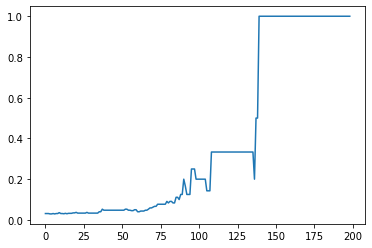

In [38]:
from matplotlib import pyplot as plt
plt.plot(f)

#### Conclusion

Thus, a genetic algorithm has been used to solve the given problem.